Comparing GOES XRS 15 and 16 - 1s from fido/sunpy and direct download of avg1min

* 25-May-2020 IGH

In [1]:
import matplotlib
import matplotlib.pyplot as plt

from sunpy import timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a

# Just setup plot fonts
plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular"})

In [2]:
# Find and download the GOES15 and 16 for event (which also have GOES14 and 17)
trange=a.Time("2018-06-21 01:00","2018-06-21 01:30")
# rg15 = Fido.search(trange, a.Instrument("XRS"), a.goes.SatelliteNumber(15))
# print(rg15)
# rg16 = Fido.search(trange, a.Instrument("XRS"), a.goes.SatelliteNumber(16))
# print(rg16)

In [3]:
# Download the data
outdir='/Users/iain/sunpy/data/'
# fg15 = Fido.fetch(rg15,path=outdir)
# fg16 = Fido.fetch(rg16,path=outdir)

In [4]:
#  These are the default ones from Fido, which might not be optimal ones.....
fn15=outdir+"sci_gxrs-l2-irrad_g15_d20180621_v0-0-0.nc"
fn16=outdir+"sci_xrsf-l2-flx1s_g16_d20180621_v2-1-0.nc"
# print(fn15,fn16)
g15 = ts.TimeSeries(fn15, concatenate=True)
g16 = ts.TimeSeries(fn16, concatenate=True)
tg15=g15.truncate(trange.start.iso,trange.end.iso)
tg16=g16.truncate(trange.start.iso,trange.end.iso)

tg15_tims=tg15.index
tg15_x05=tg15.quantity("xrsa").value
tg15_x18=tg15.quantity("xrsb").value
tg16_tims=tg16.index
tg16_x05=tg16.quantity("xrsa").value
tg16_x18=tg16.quantity("xrsb").value

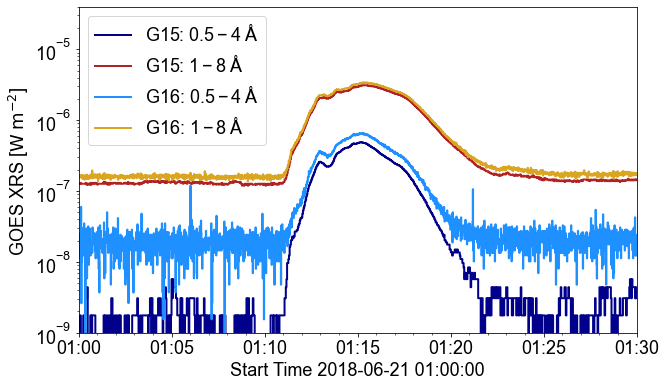

In [5]:
fig,ax = plt.subplots(figsize=(10, 6))
plt.plot(tg15_tims,tg15_x05,drawstyle='steps-post',marker=None,color='darkblue',lw=2,label='G15: $0.5-4\;\AA$')
plt.plot(tg15_tims,tg15_x18,drawstyle='steps-post',marker=None,color='firebrick',lw=2,label='G15: $1-8\;\AA$')
plt.plot(tg16_tims,tg16_x05,drawstyle='steps-post',marker=None,color='dodgerblue',lw=2,label='G16: $0.5-4\;\AA$')
plt.plot(tg16_tims,tg16_x18,drawstyle='steps-post',marker=None,color='goldenrod',lw=2,label='G16: $1-8\;\AA$')
ax.set_ylabel("GOES XRS [$\mathrm{W\;m^{-2}}$] ")
ax.set_xlabel("Start Time "+trange.start.iso[:-4])
ax.set_yscale("log")
ax.set_ylim([1e-9,4e-5])
ax.set_xlim([trange.start.datetime,trange.end.datetime])
# precisely control the x time labels
myFmt = matplotlib.dates.DateFormatter('%H:%M')
majorx= matplotlib.dates.MinuteLocator(interval=5)
minorx= matplotlib.dates.MinuteLocator(interval=1)
ax.xaxis.set_major_locator(majorx)
ax.xaxis.set_minor_locator(minorx)
ax.xaxis.set_major_formatter(myFmt)

plt.legend()
plt.show()

In [6]:
# Manually have downloaded the avg1min for GOES15 and GOES16 and put in outdir, load in here
# https://satdat.ngdc.noaa.gov/sem/goes/data/science/xrs/goes15/xrsf-l2-avg1m_science/2018/06/sci_xrsf-l2-avg1m_g15_d20180621_v1-0-0.nc
# https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2018/06/sci_xrsf-l2-avg1m_g16_d20180621_v2-1-0.nc
fn15_1=outdir+"sci_xrsf-l2-avg1m_g15_d20180621_v1-0-0.nc"
fn16_1=outdir+"sci_xrsf-l2-avg1m_g16_d20180621_v2-1-0.nc"

g15_1 = ts.TimeSeries(fn15_1, concatenate=True)
tg15_1=g15_1.truncate(trange.start.iso,trange.end.iso)
tg15_1_tims=tg15_1.index
tg15_1_x05=tg15_1.quantity("xrsa").value
tg15_1_x18=tg15_1.quantity("xrsb").value

g16_1 = ts.TimeSeries(fn16_1, concatenate=True)
tg16_1=g16_1.truncate(trange.start.iso,trange.end.iso)
tg16_1_tims=tg16_1.index
tg16_1_x05=tg16_1.quantity("xrsa").value
tg16_1_x18=tg16_1.quantity("xrsb").value


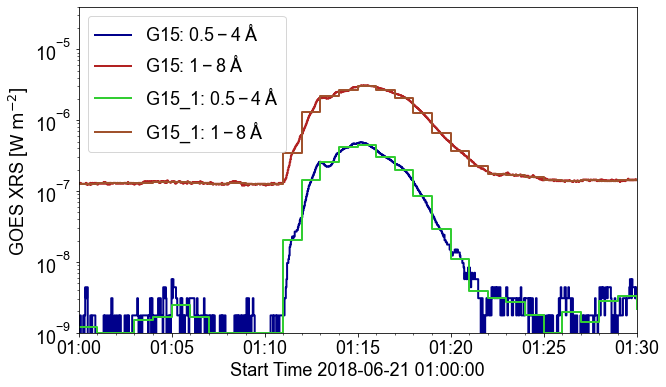

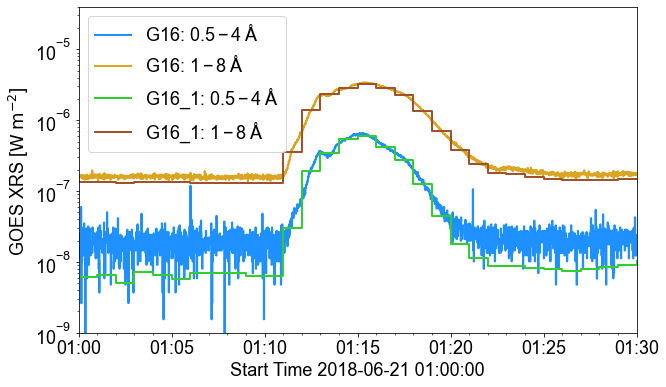

In [7]:
fig,ax = plt.subplots(figsize=(10, 6))
plt.plot(tg15_tims,tg15_x05,drawstyle='steps-post',marker=None,color='darkblue',lw=2,label='G15: $0.5-4\;\AA$')
plt.plot(tg15_tims,tg15_x18,drawstyle='steps-post',marker=None,color='firebrick',lw=2,label='G15: $1-8\;\AA$')
plt.plot(tg15_1_tims,tg15_1_x05,drawstyle='steps-post',marker=None,color='limegreen',lw=2,label='G15_1: $0.5-4\;\AA$')
plt.plot(tg15_1_tims,tg15_1_x18,drawstyle='steps-post',marker=None,color='sienna',lw=2,label='G15_1: $1-8\;\AA$')

ax.set_ylabel("GOES XRS [$\mathrm{W\;m^{-2}}$] ")
ax.set_xlabel("Start Time "+trange.start.iso[:-4])
ax.set_yscale("log")
ax.set_ylim([1e-9,4e-5])
ax.set_xlim([trange.start.datetime,trange.end.datetime])
# precisely control the x time labels
myFmt = matplotlib.dates.DateFormatter('%H:%M')
majorx= matplotlib.dates.MinuteLocator(interval=5)
minorx= matplotlib.dates.MinuteLocator(interval=1)
ax.xaxis.set_major_locator(majorx)
ax.xaxis.set_minor_locator(minorx)
ax.xaxis.set_major_formatter(myFmt)

plt.legend()
plt.show()

fig,ax = plt.subplots(figsize=(10, 6))
plt.plot(tg16_tims,tg16_x05,drawstyle='steps-post',marker=None,color='dodgerblue',lw=2,label='G16: $0.5-4\;\AA$')
plt.plot(tg16_tims,tg16_x18,drawstyle='steps-post',marker=None,color='goldenrod',lw=2,label='G16: $1-8\;\AA$')
plt.plot(tg16_1_tims,tg16_1_x05,drawstyle='steps-post',marker=None,color='limegreen',lw=2,label='G16_1: $0.5-4\;\AA$')
plt.plot(tg16_1_tims,tg16_1_x18,drawstyle='steps-post',marker=None,color='sienna',lw=2,label='G16_1: $1-8\;\AA$')

ax.set_ylabel("GOES XRS [$\mathrm{W\;m^{-2}}$] ")
ax.set_xlabel("Start Time "+trange.start.iso[:-4])
ax.set_yscale("log")
ax.set_ylim([1e-9,4e-5])
ax.set_xlim([trange.start.datetime,trange.end.datetime])
# precisely control the x time labels
myFmt = matplotlib.dates.DateFormatter('%H:%M')
majorx= matplotlib.dates.MinuteLocator(interval=5)
minorx= matplotlib.dates.MinuteLocator(interval=1)
ax.xaxis.set_major_locator(majorx)
ax.xaxis.set_minor_locator(minorx)
ax.xaxis.set_major_formatter(myFmt)

plt.legend()
plt.show()

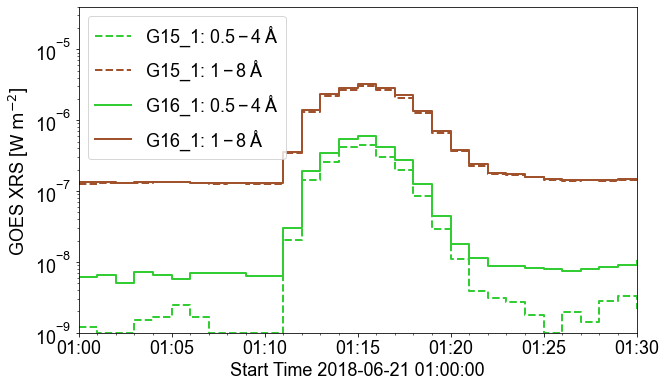

In [8]:
fig,ax = plt.subplots(figsize=(10, 6))
plt.plot(tg15_1_tims,tg15_1_x05,drawstyle='steps-post',marker=None,color='limegreen',ls='--',lw=2,label='G15_1: $0.5-4\;\AA$')
plt.plot(tg15_1_tims,tg15_1_x18,drawstyle='steps-post',marker=None,color='sienna',ls='--',lw=2,label='G15_1: $1-8\;\AA$')
plt.plot(tg16_1_tims,tg16_1_x05,drawstyle='steps-post',marker=None,color='limegreen',lw=2,label='G16_1: $0.5-4\;\AA$')
plt.plot(tg16_1_tims,tg16_1_x18,drawstyle='steps-post',marker=None,color='sienna',lw=2,label='G16_1: $1-8\;\AA$')
ax.set_ylabel("GOES XRS [$\mathrm{W\;m^{-2}}$] ")
ax.set_xlabel("Start Time "+trange.start.iso[:-4])
ax.set_yscale("log")
ax.set_ylim([1e-9,4e-5])
ax.set_xlim([trange.start.datetime,trange.end.datetime])
# precisely control the x time labels
myFmt = matplotlib.dates.DateFormatter('%H:%M')
majorx= matplotlib.dates.MinuteLocator(interval=5)
minorx= matplotlib.dates.MinuteLocator(interval=1)
ax.xaxis.set_major_locator(majorx)
ax.xaxis.set_minor_locator(minorx)
ax.xaxis.set_major_formatter(myFmt)

plt.legend()
plt.show()

In [9]:
# Print max value - i.e. GOES Class
print("GOES15: {0:.2e}".format(max(tg15_x18)))
print("GOES15 avg1min: {0:.2e}".format(max(tg15_1_x18)))
print("GOES16: {0:.2e}".format(max(tg16_x18)))
print("GOES16 avg1min: {0:.2e}".format(max(tg16_1_x18)))

GOES15: 3.12e-06
GOES15 avg1min: 3.05e-06
GOES16: 3.40e-06
GOES16 avg1min: 3.28e-06
